In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# Load data
df1 = pd.read_csv('/kaggle/input/vaers1fill/vaers1fill.csv', encoding="ISO-8859-1")
df = df1.head(100000).copy()

/tmp/ipykernel_31/3297036261.py:9: DtypeWarning: Columns (14,16,17,18,19,20,22,23,30,34,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/kaggle/input/vaers1fill/vaers1fill.csv', encoding="ISO-8859-1")


In [26]:
df.columns

Index(['VAERS_ID', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME', 'RECVDATE', 'STATE', 'AGE_YRS',
       'CAGE_YR', 'CAGE_MO', 'SEX', 'RPT_DATE', 'SYMPTOM_TEXT', 'DIED',
       'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY',
       'DISABLE', 'RECOVD', 'VAX_DATE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA',
       'V_ADMINBY', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY',
       'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT',
       'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'SYMPTOM1', 'SYMPTOMVERSION1',
       'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3',
       'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5',
       'othermeds', 'curr_ill', 'allergies', 'sex', 'disable', 'manu', 'dur',
       'Allergic_his', 'diabetes', 'hypertension', 'arthritis', 'Asthma',
       'Migraine', 'copd', 'Anxiety', 'obesity', 'depression', 'Thyroid',
       'Anemia', 'Dementia', 'Cancer',

Top 20 triệu chứng phổ biến:
headache: 18576 reports
chills: 15101 reports
pyrexia: 14632 reports
pain: 14021 reports
fatigue: 13667 reports
nausea: 10195 reports
injection site pain: 8446 reports
dizziness: 8199 reports
injection site erythema: 8168 reports
pain in extremity: 7870 reports
myalgia: 6342 reports
injection site swelling: 6077 reports
injection site pruritus: 5479 reports
arthralgia: 5463 reports
pruritus: 5233 reports
injection site warmth: 4369 reports
rash: 4268 reports
erythema: 4126 reports
vomiting: 3383 reports
dyspnoea: 3318 reports


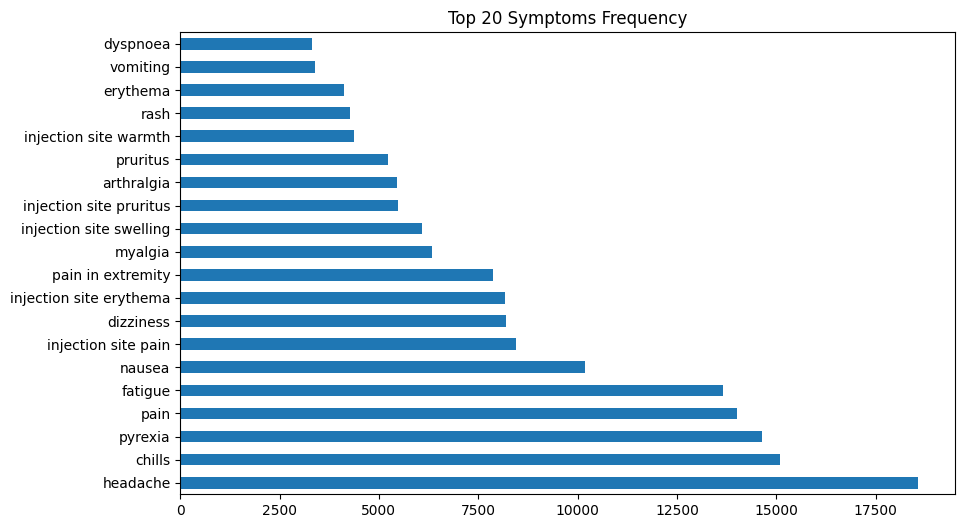

In [27]:
import matplotlib.pyplot as plt

# Lấy tất cả triệu chứng từ SYMPTOM1-5 và ghép thành 1 list
all_symptoms = []
for col in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
    symptoms = df[col].dropna().str.lower().tolist()  # Chuyển về chữ thường để chuẩn hóa
    all_symptoms.extend(symptoms)

# Đếm tần suất triệu chứng
from collections import Counter
symptom_counts = Counter(all_symptoms)

# Top 20 triệu chứng phổ biến nhất
print("Top 20 triệu chứng phổ biến:")
for symptom, count in symptom_counts.most_common(20):
    print(f"{symptom}: {count} reports")

# Visualize
plt.figure(figsize=(10, 6))
pd.Series(dict(symptom_counts.most_common(20))).plot(kind='barh')
plt.title('Top 20 Symptoms Frequency')
plt.show()

In [ ]:
print(len(df1))

In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# 1. Load dữ liệu
df = df1.head(100000).copy()

# 2. Chọn cột triệu chứng và cột hậu quả
symptom_cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']
outcome_cols = ['DIED', 'L_THREAT', 'DISABLE', 'HOSPITAL', 'ER_VISIT']

# 3. Gán nhãn SEVERE từ các cột hậu quả
df['SEVERE'] = df[outcome_cols].eq('Y').any(axis=1).astype(int)

# 4. Loại bỏ dòng không có triệu chứng
df_symptoms = df[symptom_cols + ['SEVERE']].dropna(subset=symptom_cols, how='all')

# 5. Tạo danh sách triệu chứng (1 record = list of 1–5 symptoms)
def combine_symptoms(row):
    return list(filter(pd.notnull, [row[col] for col in symptom_cols]))

df_symptoms['SYMPTOM_LIST'] = df_symptoms.apply(combine_symptoms, axis=1)

# 6. Encode triệu chứng bằng MultiLabelBinarizer
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(df_symptoms['SYMPTOM_LIST'])
y = df_symptoms['SEVERE'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
import numpy as np

num_label_1 = np.sum(y == 1)
percent_label_1 = np.mean(y == 1) * 100

print(f"Số lượng nhãn 1 (nghiêm trọng): {num_label_1}")
print(f"Tỷ lệ nhãn 1 (nghiêm trọng): {percent_label_1:.2f}%")

In [ ]:
from sklearn.model_selection import train_test_split

# 1. Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

## Part 1a  
Dự đoán triệu chứng có dẫn đến tình trạng nghiệm trọng hay không, và lấy ra 20 triệu chứng quan trọng nhất ảnh hưởng đến việc dự đoán

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.linear_model import SGDClassifier



# 2. Định nghĩa các mô hình
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=300, random_state=42),
    'Support Vector Machine' : SGDClassifier(loss='hinge', class_weight='balanced', random_state=42),
    'MLP (2 layers)': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=250, random_state=42)
}

# 3. Lưu trữ đặc trưng quan trọng từ các mô hình
feature_importance_dict = {}

# 4. Huấn luyện và đánh giá các mô hình
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)

    # Dự đoán
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test)  # Dùng score để tính AUC
    # In báo cáo
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))

    # AUC-ROC cho bài toán nhị phân
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC Score: {auc:.4f}")

    # Lấy 20 đặc trưng quan trọng nhất
    if name == 'Random Forest':
        imp_rf = model.feature_importances_
        idx_rf = np.argsort(imp_rf)[::-1][:20]
        feature_importance_dict['Random Forest'] = idx_rf
        print("Top 20 Features (Random Forest):", idx_rf)

    elif name == 'Logistic Regression':
        imp_lr = np.abs(model.coef_).ravel()
        idx_lr = np.argsort(imp_lr)[::-1][:20]
        feature_importance_dict['Logistic Regression'] = idx_lr
        print("Top 20 Features (Logistic Regression):", idx_lr)

    elif name == 'Support Vector Machine':
        # SVM (nếu kernel='linear', có thể lấy coef_)
        if hasattr(model, 'coef_'):
            imp_svm = np.abs(model.coef_).ravel()
            idx_svm = np.argsort(imp_svm)[::-1][:20]
            feature_importance_dict['Support Vector Machine'] = idx_svm
            print("Top 20 Features (SVM):", idx_svm)

    elif name == 'MLP (2 layers)':
        # MLP (Dùng tổng độ lớn của weights đầu vào)
        imp_mlp = np.sum(np.abs(model.coefs_[0]), axis=1)
        idx_mlp = np.argsort(imp_mlp)[::-1][:20]
        feature_importance_dict['MLP (2 layers)'] = idx_mlp
        print("Top 20 Features (MLP):", idx_mlp)

    print("\n" + "-"*50 + "\n")

# 5. Tổng hợp các đặc trưng quan trọng từ tất cả các mô hình
all_importances = []
for model_name, features in feature_importance_dict.items():
    all_importances.extend(features)

# 6. Đếm tần suất xuất hiện của các đặc trưng quan trọng nhất
from collections import Counter
feature_counts = Counter(all_importances)

# 7. Chọn 20 đặc trưng quan trọng nhất (theo tần suất xuất hiện hoặc độ quan trọng trung bình)
top_20_features = [feature for feature, _ in feature_counts.most_common(20)]

# In ra các đặc trưng quan trọng nhất
print("Top 20 Features (Total from All Models):", top_20_features)


In [ ]:
# 1. Lấy tên triệu chứng từ MultiLabelBinarizer
symptom_names = mlb.classes_

# 2. Sửa phần tổng hợp đặc trưng quan trọng để lấy tên thay vì chỉ số
feature_importance_dict_with_names = {}
for model_name, feature_indices in feature_importance_dict.items():
    feature_importance_dict_with_names[model_name] = [symptom_names[i] for i in feature_indices]

# 3. In tên các triệu chứng quan trọng theo từng mô hình
for model_name, features in feature_importance_dict_with_names.items():
    print(f"Top 20 Features ({model_name}):")
    for i, feature in enumerate(features, 1):
        print(f"{i}. {feature}")
    print("\n" + "-"*50 + "\n")

# 4. Tổng hợp tất cả các đặc trưng quan trọng (dùng tên thay vì chỉ số)
all_importances_with_names = []
for model_name, features in feature_importance_dict_with_names.items():
    all_importances_with_names.extend(features)

# 5. Đếm tần suất xuất hiện của các triệu chứng quan trọng
feature_counts_with_names = Counter(all_importances_with_names)

# 6. Chọn 20 triệu chứng quan trọng nhất (theo tần suất xuất hiện)
top_20_features_with_names = [feature for feature, _ in feature_counts_with_names.most_common(20)]

# 7. In ra các triệu chứng quan trọng nhất
print("Top 20 Most Important Symptoms (Across All Models):")
for i, feature in enumerate(top_20_features_with_names, 1):
    print(f"{i}. {feature}")

## Part 1b
Sử dụng các thuật toán giảm chiều dữ liệu để so sánh độ chính xác khi dự đoán tình trạng nghiêm trọng

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np

from sklearn.metrics import roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np

# ========== PHẦN 1: Giảm chiều dữ liệu ==========
print(f"Số chiều ban đầu của dữ liệu: {X_train.shape[1]}")

# 1. PCA - Principal Component Analysis
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Số chiều sau PCA: {pca.n_components_}")


# 2. LDA - Linear Discriminant Analysis
lda = LDA(n_components=1)  # Chỉnh lại thành 2 nếu bạn có ít lớp hơn
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

print(f"Số chiều sau LDA: {X_train_lda.shape[1]}")


# ========== PHẦN 2: Định nghĩa các mô hình ==========

models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=300, random_state=42),
    'Support Vector Machine' : SGDClassifier(loss='hinge', class_weight='balanced', random_state=42),
    'MLP (2 layers)': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=250, random_state=42)
}

# ========== PHẦN 3: Huấn luyện và đánh giá các mô hình với dữ liệu đã giảm chiều ==========

print("=== SO SÁNH CÁC MÔ HÌNH VỚI GIẢM CHIỀU DỮ LIỆU ===\n")

# 1. So sánh mô hình với PCA
print("== Sử dụng PCA (5 thành phần) ==")
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_pca)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test_pca)  # Dùng score để tính AUC
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC Score: {auc:.4f}")
    print("\n" + "-"*50 + "\n")

# 2. So sánh mô hình với LDA
print("== Sử dụng LDA (2 thành phần) ==")
for name, model in models.items():
    model.fit(X_train_lda, y_train)
    y_pred = model.predict(X_test_lda)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_lda)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test_lda)  # Dùng score để tính AUC
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC-ROC Score: {auc:.4f}")
    print("\n" + "-"*50 + "\n")


# Part 2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, jaccard_score, roc_auc_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt

# ========== PHẦN 1: TIỀN XỬ LÝ DỮ LIỆU ==========

df = df1.head(100000).copy()

# 1. Fill missing
df.iloc[:, 52:57] = df.iloc[:, 52:57].fillna(0)     # SYMPTOM1-5
df.iloc[:, 65:79] = df.iloc[:, 65:79].fillna(0)     # tiền sử bệnh

# 2. Lọc dữ liệu cơ bản
df = df[(df['SEX'] != 'U') &
        (df['VAX_MANU'] != 'UNKNOWN MANUFACTURER') &
        (df['AGE_YRS'] > 11)]

# 3. Drop missing cho outcome và covariates (không bao gồm cột 'dur')
symptom_cols = ['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']
history_cols = df.columns[65:79].tolist()
numeric_raw = ['AGE_YRS', 'othermeds', 'allergies', 'disable', 'curr_ill']
covariates = ["AGE_YRS", "SEX", "VAX_MANU", "othermeds", "allergies", "disable"] + history_cols

df.dropna(subset=covariates, inplace=True)  # Không bao gồm 'dur'
scaler = StandardScaler()
df[numeric_raw] = scaler.fit_transform(df[numeric_raw])

# ========== PHẦN 2: XÁC ĐỊNH 20 TRIỆU CHỨNG QUAN TRỌNG NHẤT ==========
top_20_symptoms = top_20_features_with_names

# ========== PHẦN 3: CHUẨN BỊ DỮ LIỆU CHO MÔ HÌNH ==========
# 1. Multilabel binarization cho top 20
def extract_symptoms(row):
    return [s.strip() for s in row[symptom_cols].astype(str).tolist() if s.strip()!='' and s.strip() in top_20_symptoms]

mlb = MultiLabelBinarizer(classes=top_20_symptoms)
y = mlb.fit_transform(df.apply(extract_symptoms, axis=1))

# 2. Features: các covariates + tiền sử (không dùng lại symptom_cols)
X = pd.get_dummies(df[["AGE_YRS", "SEX", "VAX_MANU", "othermeds", "allergies", "disable"] + history_cols],
                   drop_first=True)

# 3. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
X.columns


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, jaccard_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
# ========== PHẦN 4B: ENSEMBLE MÔ HÌNH ==========

# 1. Định nghĩa các base learners
clf1 = LogisticRegression(max_iter=300, class_weight='balanced', random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf3 = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=250, random_state=42)
clf4 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf5 = SGDClassifier(loss='hinge', class_weight='balanced', random_state=42)
clf6 = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Tạo lại 7 base model độc lập
base_models = [clf1, clf2, clf3, clf4, clf5, clf6]
trained_models = []

# Train MultiOutputClassifier cho từng model
for base_clf in base_models:
    clf = MultiOutputClassifier(clone(base_clf))
    clf.fit(X_train, y_train)
    trained_models.append(clf)

# Custom soft voting ưu tiên mẫu dương với quy tắc ít nhất 2 mô hình đoán là 1
n_labels = y_test.shape[1]
y_pred_custom = np.zeros_like(y_test)

for i in range(n_labels):
    # Lấy xác suất của label 1 từ từng model cho nhãn thứ i
    probas = []
    for model in trained_models:
        estimator = model.estimators_[i]
        if hasattr(estimator, "predict_proba"):
            proba = estimator.predict_proba(X_test)[:, 1]
        elif hasattr(estimator, "decision_function"):
            scores = estimator.decision_function(X_test)
            # Chuyển score về xác suất xấp xỉ bằng sigmoid (nếu cần)
            proba = 1 / (1 + np.exp(-scores))
        else:
            raise ValueError(f"Model {estimator} doesn't support predict_proba or decision_function.")
        probas.append(proba)
    probas = np.array(probas)

    # Quy tắc voting: nếu có ít nhất 2 model đoán là 1 thì predict = 1
    y_pred_custom[:, i] = (probas >= 0.5).sum(axis=0) >= 2  # Kiểm tra nếu có >= 2 mô hình đoán 1
    y_pred_custom[:, i] = y_pred_custom[:, i].astype(int)

# In báo cáo đánh giá mô hình
print(classification_report(y_test, y_pred_custom))



In [ ]:
# Classification report
print("\n[ENSEMBLE-CUSTOM] Đánh giá theo từng triệu chứng:")
for i, sym in enumerate(top_20_symptoms):
    print(f"\n>>> {sym}:")
    print(classification_report(y_test[:, i], y_pred_custom[:, i], zero_division=0))

# Jaccard score
print("\n[ENSEMBLE-CUSTOM] Jaccard Score (samples average):",
      jaccard_score(y_test, y_pred_custom, average='samples'))

# AUC-ROC (dùng mô hình RandomForest trong nhóm để đánh giá xác suất, hoặc 1 mô hình bất kỳ)
print("\n[ENSEMBLE-CUSTOM] AUC-ROC cho từng triệu chứng:")
for i, sym in enumerate(top_20_symptoms):
    if np.sum(y_test[:, i]) == 0:
        print(f"{sym}: Bỏ qua (không có nhãn dương trong test)")
        continue
    # Ví dụ dùng random forest để lấy xác suất
    proba = trained_models[1].estimators_[i].predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test[:, i], proba)
    print(f"{sym}: AUC = {auc:.4f}")
